# **CodSoft - Data Science Internship**

# **TASK 2 - MOVIE RATING PREDICTION WITH PYTHON**

### Author : TANAY CHOUBEY
[![alt text](https://logoeps.com/wp-content/uploads/2014/02/25231-github-cat-in-a-circle-icon-vector-icon-vector-eps.png "Git Hub Link")](https://github.com/Tanay-Choubey)

#### Problem Statement:
####1. Build a model that predicts the rating of a movie based on features like genre, director, and actors. You can use regression techniques to tackle this problem.

#### 2. The goal is to analyze historical movie data and develop a model that accurately estimates the rating given to a movie by users or critics.

#### Dataset link :- https://www.kaggle.com/datasets/adrianmcmahon/imdb-india-movies

### Importing the neccesary Libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

### Loading the dataset and getting info about it

In [26]:
movie = pd.read_csv(r'/content/IMDb_Movies_India.csv', encoding='latin-1')

In [27]:
movie.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [28]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [29]:
movie.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [30]:
movie.shape

(15509, 10)

### Cleaning & Evaluating for missing data and null values of data

In [16]:
movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [31]:
movie.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

There are so many null values and NA values in data, we have to clean it.

In [32]:
movie.dropna(inplace=True)
movie

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [33]:
movie['Year'] = movie['Year'].str.extract('(\d+)')
movie

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,2001,153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,1989,125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,1999,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [34]:
movie['Year'] = pd.to_numeric(movie['Year'], errors='coerce')
movie

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,2001,153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,1989,125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,1999,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [35]:
movie['Duration'] = movie['Duration'].str.extract('(\d+)')
movie['Duration'] = pd.to_numeric(movie['Duration'], errors='coerce')
movie

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,2001,153,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [36]:
movie['Votes'] = movie['Votes'].str.replace(',', '').astype(int)
movie["Votes"]

1           8
3          35
5         827
6        1086
8         326
         ... 
15493     408
15494    1496
15503      44
15505     655
15508      20
Name: Votes, Length: 5659, dtype: int64

In [37]:
movie.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

We can see there is no null values. Now our data is perfect for Visualization

In [39]:
movie.shape

(5659, 10)

### Data Visualization

In [44]:
movie.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,2014,116,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
10,1:1.6 An Ode to Lost Love,2004,96,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,1:13:7 Ek Tera Saath,2016,120,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
12,100 Days,1991,161,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey
13,100% Love,2012,166,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh


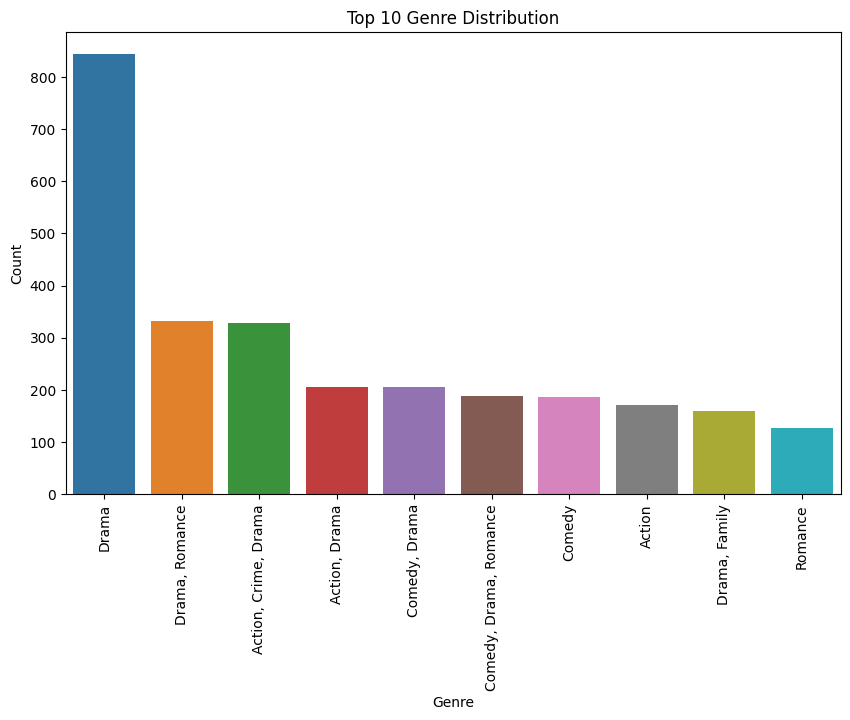

In [43]:
top_10_genre_counts = movie['Genre'].value_counts().head(10)

plt.figure(figsize=(10, 6))

ax = sns.barplot(x=top_10_genre_counts.index, y=top_10_genre_counts.values)
ax.set_title("Top 10 Genre Distribution")
ax.set_xlabel("Genre")
ax.set_ylabel("Count")
plt.xticks(rotation=90)

# Show the plot
plt.show()

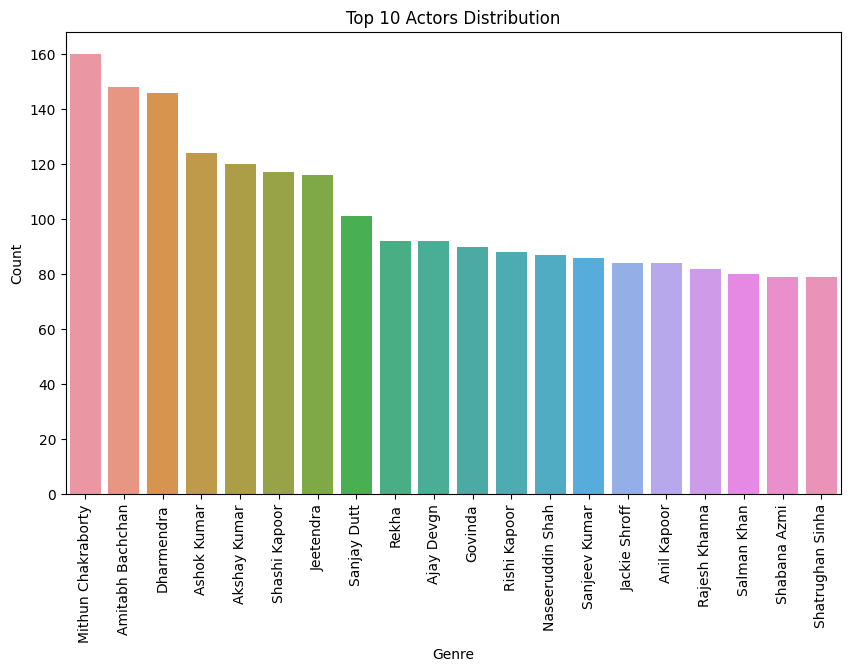

In [47]:
top_10_actors_counts =  pd.concat([movie['Actor 1'], movie['Actor 2'], movie['Actor 3']]).value_counts().head(20)

plt.figure(figsize=(10, 6))

ax = sns.barplot(x=top_10_actors_counts.index, y=top_10_actors_counts.values)
ax.set_title("Top 10 Actors Distribution")
ax.set_xlabel("Genre")
ax.set_ylabel("Count")
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [52]:
df = movie.groupby('Genre')['Rating'].mean()
df1 =  df.nlargest(15)
df1

Genre
History, Romance                   9.40
Documentary, Family, History       9.30
Documentary, Music                 8.90
Documentary, Thriller              8.70
Documentary, Sport                 8.60
Animation, Comedy, Family          8.30
Biography, Family                  8.30
Music, Romance                     8.25
Documentary, Biography, Musical    8.20
Drama, Musical, Sport              8.10
Comedy, Musical, Drama             8.00
Documentary, History, News         8.00
Fantasy, Musical, Mystery          8.00
Documentary, History               7.95
Crime, Drama, History              7.90
Name: Rating, dtype: float64

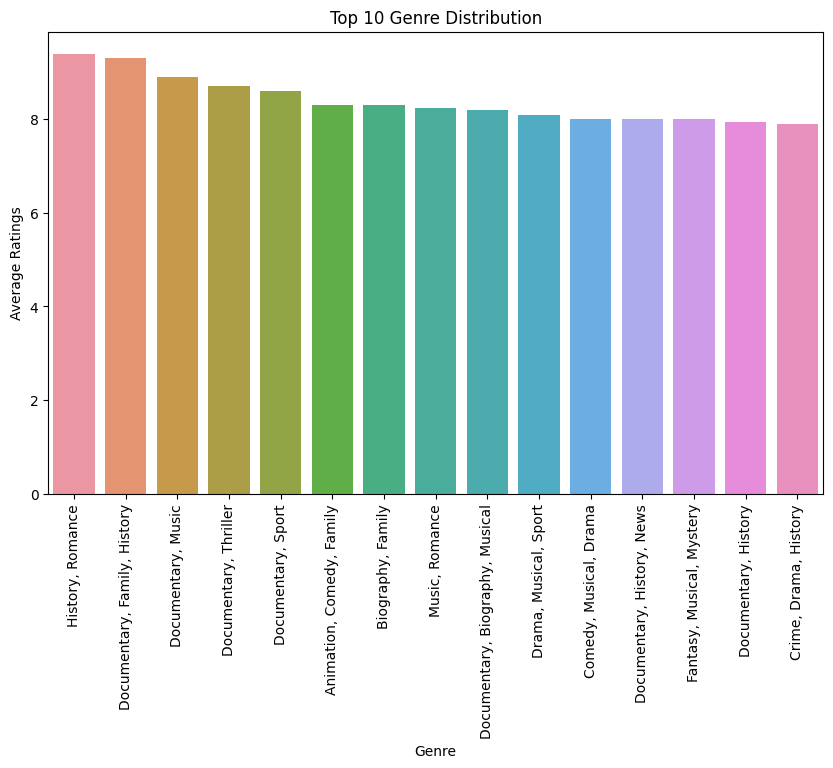

In [53]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(x=df1.index, y=df1.values)
ax.set_title("Top 10 Genre Distribution")
ax.set_xlabel("Genre")
ax.set_ylabel("Average Ratings")
plt.xticks(rotation=90)

# Show the plot
plt.show()

Name
Life of Pi                591417
3 Idiots                  357889
Lion                      220526
Gandhi                    220118
The Darjeeling Limited    185127
Like Stars on Earth       175810
PK                        168150
Dangal                    165074
Radhe                     162455
Dil Bechara               117377
Name: Votes, dtype: int64


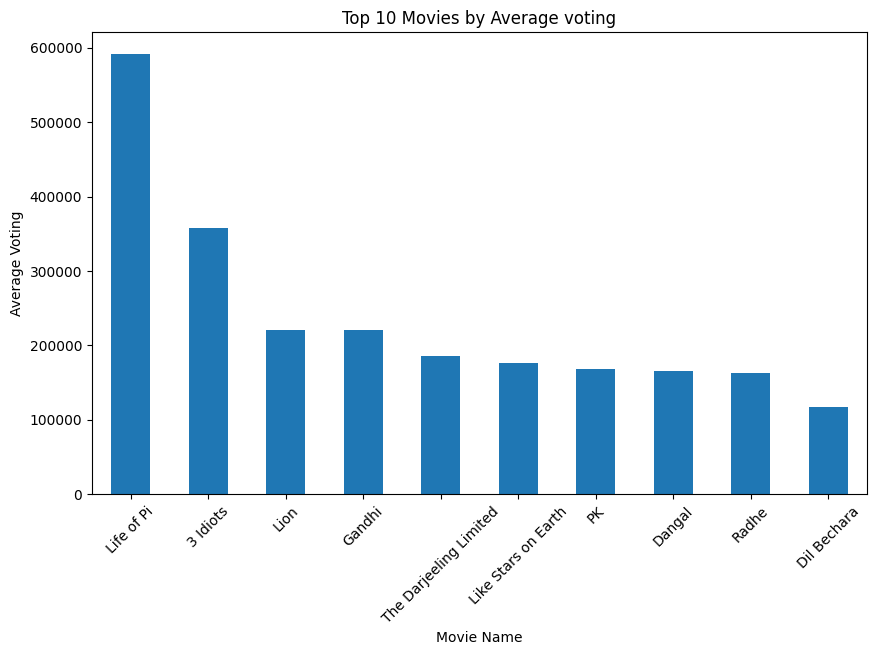

In [57]:
df2 = movie.groupby('Name')['Votes'].sum()

# Get the top 10 movies with the highest sum of ratings
top_10_movies_votes = df2.nlargest(10)

# Now 'top_10_movies' contains the top 10 movies with the highest sum of ratings
print(top_10_movies_votes)

# Create a bar plot for the top 10 movies
top_10_movies_votes.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Movie Name')
plt.ylabel('Average Voting')
plt.title('Top 10 Movies by Average voting')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

Genre
Drama, Musical, Sport         107234.000000
Adventure, Drama, Fantasy      59348.200000
Action, Comedy, Horror         49164.000000
Adventure, Family, Fantasy     39831.500000
Crime, Drama, Music            26276.000000
Drama, Family, Sport           26210.000000
Action, Crime, Fantasy         23206.000000
Action, Biography, Drama       21826.833333
Biography, Drama, Sport        20181.166667
Drama, Fantasy, Horror         16474.500000
Name: Votes, dtype: float64


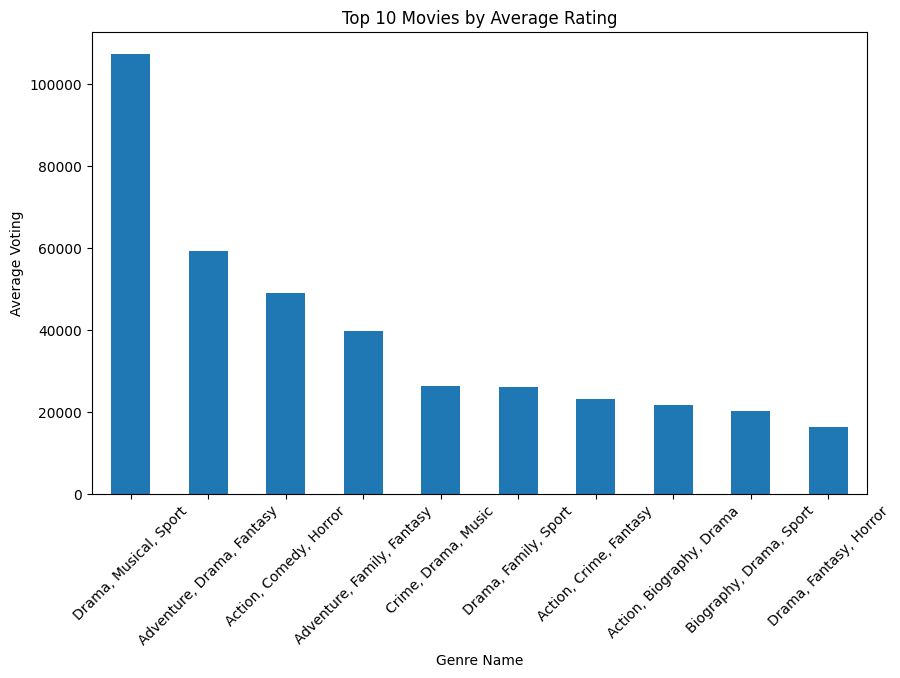

In [58]:
df3 = movie.groupby('Genre')['Votes'].mean()

# Get the top 10 movies with the highest sum of ratings
top_10_genre_voting = df3.nlargest(10)

# Now 'top_10_movies' contains the top 10 movies with the highest sum of ratings
print(top_10_genre_voting)

# Create a bar plot for the top 10 movies
top_10_genre_voting.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Genre Name')
plt.ylabel('Average Voting')
plt.title('Top 10 Movies by Average Rating')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

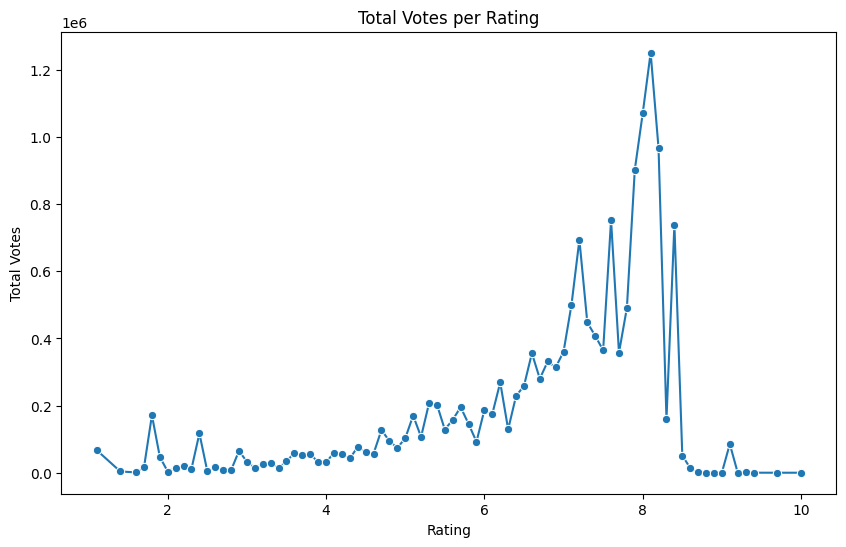

In [59]:
rating_votes = movie.groupby('Rating')['Votes'].sum().reset_index()
plt.figure(figsize=(10, 6))
ax_line_seaborn = sns.lineplot(data=rating_votes, x='Rating', y='Votes', marker='o')
ax_line_seaborn.set_xlabel('Rating')
ax_line_seaborn.set_ylabel('Total Votes')
ax_line_seaborn.set_title('Total Votes per Rating')
plt.show()

### Separating features and Spiting Data

In [61]:
Input_data = movie.drop(['Name', 'Genre', 'Rating', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], axis=1)
Output_data= movie['Rating']

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(Input_data, Output_data, test_size = 0.15, random_state = 42)

### Model Traning and Prediction

1. **Linear Regression**

In [63]:
#Using Linear Regression
lr =LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [64]:
pred_1 = lr.predict(X_test)
pred_1

array([5.80705184, 5.76375793, 5.93139805, 5.62644144, 5.54825773,
       5.60744161, 5.49051647, 5.64227464, 6.00055567, 6.24780144,
       5.76230911, 5.70274045, 6.23946559, 5.8175128 , 6.2240386 ,
       6.59471813, 5.45420453, 6.34843439, 6.48231735, 5.31616311,
       6.14211089, 5.35667086, 5.50879143, 5.84884116, 6.04906454,
       5.81282824, 5.78172235, 6.17664485, 6.23915197, 5.656461  ,
       5.61644995, 5.87495922, 5.70850568, 6.10237085, 6.37188439,
       5.63836121, 6.07249592, 7.04405155, 5.49812995, 5.74438265,
       6.07183089, 5.66805057, 5.48252244, 5.74504403, 6.91726038,
       6.21402644, 5.50769347, 5.87717738, 6.31129883, 6.8779004 ,
       6.08370256, 6.08559907, 5.67371047, 5.70945546, 6.12762798,
       5.67574391, 5.80944821, 5.39453899, 5.7065608 , 5.63691141,
       6.10508122, 6.01397892, 7.09462588, 5.67453527, 5.73046292,
       6.54772123, 5.63049589, 5.55650315, 5.98116505, 5.89832275,
       5.52287265, 6.17077961, 6.47044557, 5.69763133, 6.20097

In [65]:
from sklearn.metrics import mean_absolute_error

# Assuming 'pred_1' contains your model's regression predictions and 'Y_test' contains the true target values
mae = mean_absolute_error(Y_test, pred_1)

In [66]:
# Print the Mean Absolute Error
print("Mean Absolute Error:", mae)

Mean Absolute Error: 1.0663520115222938


2. **Decision Tree**

In [68]:
#Using Decison Tree
dt = DecisionTreeRegressor()
dt.fit(X_train,Y_train)

DecisionTreeRegressor()

In [69]:
pred_2 = dt.predict(X_test)
pred_2

array([5.6, 6.7, 4.5, 3.2, 6.1, 5.4, 4.2, 4.8, 4.8, 6.8, 6.6, 7.4, 7.1,
       5.8, 6.3, 6.2, 5.9, 7.4, 6.9, 5.4, 5.6, 5.1, 7.8, 5.9, 7.3, 5.7,
       4.1, 7. , 5.4, 5.8, 5.1, 6.7, 7.6, 4.4, 4.9, 5.6, 5. , 7.2, 5.7,
       5.3, 6.8, 5.4, 5.3, 3.3, 6.5, 8.1, 3.9, 9.1, 7.7, 6.4, 6.1, 6.6,
       4.8, 3.3, 6.4, 6.9, 4.4, 5.7, 6.3, 2.9, 7.4, 4.3, 6.7, 5.4, 6.9,
       6.5, 5.2, 8.9, 6.2, 5.7, 5.3, 6.3, 6.9, 4.3, 6. , 5.9, 7.1, 4.2,
       7.3, 2.6, 6.9, 8.2, 5.7, 7.7, 5.6, 7. , 6.1, 7.2, 7. , 5.5, 4.8,
       3.8, 7.2, 6.6, 3.5, 6.5, 4.7, 4.6, 5.3, 4.8, 7.3, 6.8, 6.2, 6.7,
       6.5, 8.1, 7.9, 6.4, 7.2, 6.2, 2.4, 7.2, 6.7, 6.4, 5. , 6.1, 6.9,
       7.4, 5.1, 5.9, 6.2, 3.2, 7.3, 6.7, 4.5, 4.4, 6.7, 7.8, 4.1, 6.8,
       3.6, 2.8, 6.9, 5.1, 2.7, 3.9, 4.1, 4.1, 5.2, 7.6, 3. , 4.5, 5.1,
       3.8, 7.4, 7.2, 6.6, 3.8, 6.8, 7.3, 5.5, 8.4, 8.3, 6.6, 7.1, 8.3,
       5.4, 7.6, 6.6, 6.4, 2.1, 5.3, 6.1, 6.6, 6.4, 4.2, 7. , 6.3, 3.8,
       6.2, 6.3, 4.6, 6.5, 5.5, 4.8, 6.5, 6.5, 3.9, 5.4, 6.3, 3.

In [76]:
mae2= mean_absolute_error(Y_test, pred_2)

# Print the Mean Absolute Error
print("Mean Absolute Error:", mae2)

Mean Absolute Error: 1.195995288574794


### Conclusion - As we can see, we used 2 Algorithms to predict and both are giving diffrent Mean Absolute error and both are working fine.

# **--------------------------------------------Thank You--------------------------------------------**